## **16. 데이터 엔지니어링 예제: Energy Star Score Prediction**

### **1. 데이터 로딩 및 포맷팅**

In [1]:
import pandas as pd
import numpy as np

# 데이터프레임 로딩
df = pd.read_csv('../data/ny_energy_2016.csv')
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [2]:
# 데이터프레임 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

**[데이터 클리닝]** 데이터셋에서 결측값들이 "**Not Available**"의 텍스트로 기록됨 ${\rightarrow}$ pandas에서 인식 가능한 결측 값(```np.nan```)으로 변경

In [3]:
# “Not Available” 값 포함 여부 출력
df[df == "Not Available"].any()

Order                                                         False
Property Id                                                   False
Property Name                                                 False
Parent Property Id                                            False
Parent Property Name                                          False
BBL - 10 digits                                               False
NYC Borough, Block and Lot (BBL) self-reported                 True
NYC Building Identification Number (BIN)                       True
Address 1 (self-reported)                                     False
Address 2                                                      True
Postal Code                                                   False
Street Number                                                 False
Street Name                                                   False
Borough                                                       False
DOF Gross Floor Area                            

In [4]:
# “Not Available” 값을 np.nan으로 대체
df.replace({'Not Available': np.nan}, inplace=True) 
df[df == "Not Available"].any()

Order                                                         False
Property Id                                                   False
Property Name                                                 False
Parent Property Id                                            False
Parent Property Name                                          False
BBL - 10 digits                                               False
NYC Borough, Block and Lot (BBL) self-reported                False
NYC Building Identification Number (BIN)                      False
Address 1 (self-reported)                                     False
Address 2                                                     False
Postal Code                                                   False
Street Number                                                 False
Street Name                                                   False
Borough                                                       False
DOF Gross Floor Area                            

**[데이터 포맷팅]** 수치형 변수들의 데이터 타입을 **float64**형으로 변경

In [5]:
for col in list(df.columns):
    # 변수명에 수치 단위가 포함된 변수 선택
    if('ft²' in col or 
        'kBtu' in col or
        'Metric Tons CO2e' in col or
        'kWh' in col or
        'therms' in col or
        'gal' in col or
        'Score' in col):
            
            # 데이터 타입 변경
            df[col] = df[col].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

**[데이터 클리닝]** 1차 결측치 처리 ${\rightarrow}$ 결측 비율 높은 변수 제거

In [7]:
# 변수 별 결측치 개수
ser_miss_cnt = df.isnull().sum().sort_values(ascending = False)
ser_miss_cnt

Fuel Oil #1 Use (kBtu)                                        11737
Diesel #2 Use (kBtu)                                          11730
Address 2                                                     11539
Fuel Oil #5 & 6 Use (kBtu)                                    11152
District Steam Use (kBtu)                                     10810
Fuel Oil #4 Use (kBtu)                                        10425
3rd Largest Property Use Type                                 10262
3rd Largest Property Use Type - Gross Floor Area (ft²)        10262
Fuel Oil #2 Use (kBtu)                                         9165
2nd Largest Property Use Type                                  8005
2nd Largest Property Use - Gross Floor Area (ft²)              8005
Metered Areas  (Water)                                         4609
Water Intensity (All Water Sources) (gal/ft²)                  3984
Water Use (All Water Sources) (kgal)                           3984
NTA                                             

In [8]:
# 변수 별 결측 비율
ser_miss_rate = ser_miss_cnt / len(df)
ser_miss_rate

Fuel Oil #1 Use (kBtu)                                        0.999234
Diesel #2 Use (kBtu)                                          0.998638
Address 2                                                     0.982377
Fuel Oil #5 & 6 Use (kBtu)                                    0.949430
District Steam Use (kBtu)                                     0.920313
Fuel Oil #4 Use (kBtu)                                        0.887536
3rd Largest Property Use Type                                 0.873659
3rd Largest Property Use Type - Gross Floor Area (ft²)        0.873659
Fuel Oil #2 Use (kBtu)                                        0.780266
2nd Largest Property Use Type                                 0.681509
2nd Largest Property Use - Gross Floor Area (ft²)             0.681509
Metered Areas  (Water)                                        0.392389
Water Intensity (All Water Sources) (gal/ft²)                 0.339179
Water Use (All Water Sources) (kgal)                          0.339179
NTA   

In [9]:
# 결측 비율이 50% 이상인 변수 제거
threshold = 0.5 # 변수 제거의 임계치
print(ser_miss_rate[ser_miss_rate > 0.5])

del_list = ser_miss_rate[ser_miss_rate > 0.5].index
print(f'결측치 제거 대상 변수: {del_list}')

Fuel Oil #1 Use (kBtu)                                    0.999234
Diesel #2 Use (kBtu)                                      0.998638
Address 2                                                 0.982377
Fuel Oil #5 & 6 Use (kBtu)                                0.949430
District Steam Use (kBtu)                                 0.920313
Fuel Oil #4 Use (kBtu)                                    0.887536
3rd Largest Property Use Type                             0.873659
3rd Largest Property Use Type - Gross Floor Area (ft²)    0.873659
Fuel Oil #2 Use (kBtu)                                    0.780266
2nd Largest Property Use Type                             0.681509
2nd Largest Property Use - Gross Floor Area (ft²)         0.681509
dtype: float64
결측치 제거 대상 변수: Index(['Fuel Oil #1 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'Address 2',
       'Fuel Oil #5 & 6 Use (kBtu)', 'District Steam Use (kBtu)',
       'Fuel Oil #4 Use (kBtu)', '3rd Largest Property Use Type',
       '3rd Largest Property Use

In [10]:
# 변수 제거
df.drop(columns=del_list, inplace=True)
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


### **2. 탐색적 데이터 분석**

In [11]:
# 시각화 옵션
%matplotlib
%config InlineBackend.figure_format = 'jpg'

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.ion() # 인터랙티브 시각화

import seaborn as sns
sns.set()  # 시각화 스타일

Using matplotlib backend: module://matplotlib_inline.backend_inline


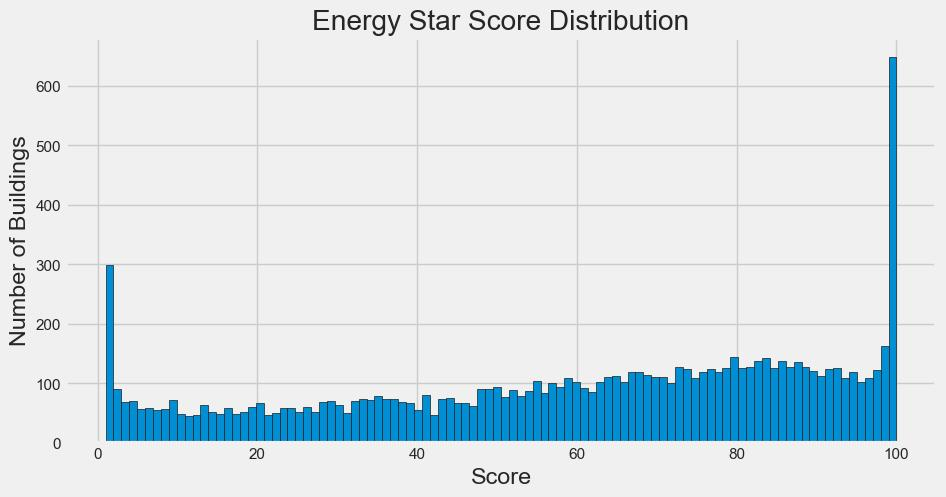

In [12]:
# 변수명 간소화 (ENERGY STAR Score)
df = df.rename(columns = {'ENERGY STAR Score': 'Score'})

# Energy Star Score 히스토그램 시각화
plt.style.use('fivethirtyeight')
plt.hist(df['Score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')
plt.show()

Text(0.5, 1.0, 'Site EUI Distribution')

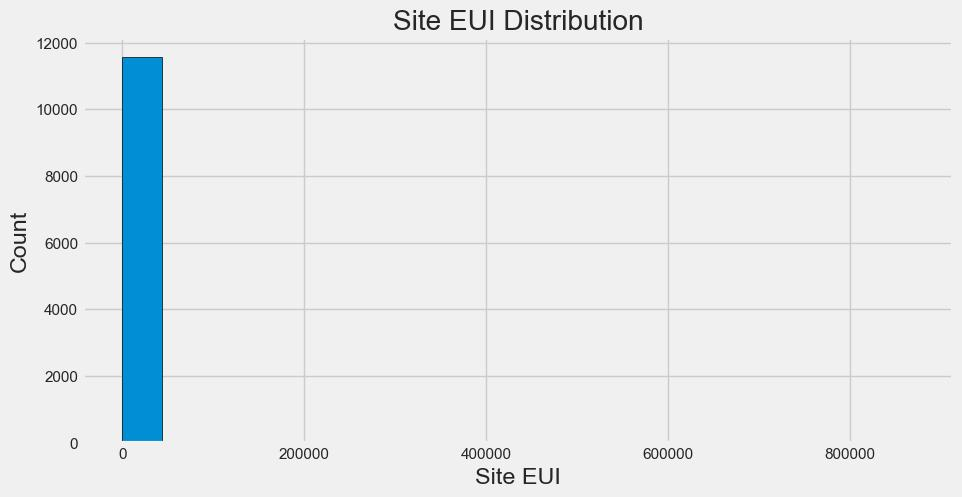

In [13]:
# Site EUI 히스토그램 시각화
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Site EUI 히스토그램이 제대로 보이지 않음 😥 ${\rightarrow}$ 기술 통계량을 확인해보자

In [14]:
# Site EUI 기술 통계
df['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [15]:
# 상위 10개의 Site EUI 값
df['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [16]:
# 가장 큰 Site EUI 값의 빌딩
df.loc[8068]

Order                                                                                                      9984
Property Id                                                                                             4414323
Property Name                                                                                      234 Skillman
Parent Property Id                                                          Not Applicable: Standalone Property
Parent Property Name                                                        Not Applicable: Standalone Property
BBL - 10 digits                                                                                      3028937502
NYC Borough, Block and Lot (BBL) self-reported                                                       3028937502
NYC Building Identification Number (BIN)                                                      3390250 , 3338313
Address 1 (self-reported)                                                                   234 Skillman

**[데이터 클리닝]** Site EUI 값을 중심으로 한 IQR 기반 **이상치 제거**

In [17]:
# Q1, Q3 계산
q1 = df['Site EUI (kBtu/ft²)'].quantile(0.25)
q3 = df['Site EUI (kBtu/ft²)'].quantile(0.75)

print('Site EUI, Q1 =', q1)
print('Site EUI, Q3 =', q3)

Site EUI, Q1 = 61.8
Site EUI, Q3 = 97.6


In [18]:
# IQR (사분위수 범위)
iqr = q3-q1

"""
상한/하한 계산 (이상치 계수 3 적용)
 - 1.5: mild outliers
 - 3: extreme outliers
"""

upper_fence = q3 + 3*iqr # 상한
lower_fence = q1 - 3*iqr # 하한

print('IQR =', iqr)
print('Upper fence =', upper_fence)
print('Lower fence =', lower_fence)

IQR = 35.8
Upper fence = 205.0
Lower fence = -45.599999999999994


In [20]:
# 이상치 제거
df = df[ (df['Site EUI (kBtu/ft²)'] < upper_fence) &
      (df['Site EUI (kBtu/ft²)'] > lower_fence) ]

df['Site EUI (kBtu/ft²)'].shape

(11319,)

Text(0.5, 1.0, 'Site EUI Distribution')

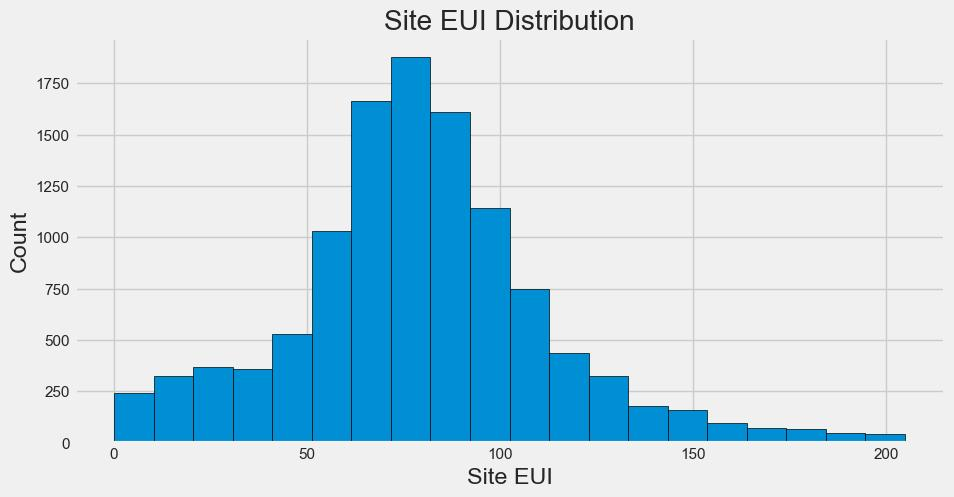

In [21]:
# Site EUI 히스토그램 시각화 (이상치 제거 후)

plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

**[데이터 탐색]** 대상 변수(Energy Star Score)와 범주형 변수와의 상관관계

범주형 변수1: **Largest Property Use Type** (주 용도에 따른 빌딩 유형)

In [22]:
# 빌딩 유형과의 상관관계
df_has_score = df.dropna(subset=['Score'])  # 스코어가 있는 데이터만 선택
types = df_has_score['Largest Property Use Type'].value_counts() # 빌딩 유형별 빈도 계산
types

Largest Property Use Type
Multifamily Housing                      7464
Office                                   1157
Hotel                                     202
Non-Refrigerated Warehouse                156
K-12 School                                97
Residence Hall/Dormitory                   96
Senior Care Community                      85
Distribution Center                        61
Retail Store                               57
Medical Office                             23
Hospital (General Medical & Surgical)      15
Financial Office                           12
Supermarket/Grocery Store                  10
Worship Facility                            9
Refrigerated Warehouse                      8
Wholesale Club/Supercenter                  3
Parking                                     3
Courthouse                                  2
Bank Branch                                 1
Name: count, dtype: int64

In [23]:
# 빈도 100 이상의 빌딩 유형
types_100 = types[types.values > 100].index
types_100

Index(['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse'], dtype='object', name='Largest Property Use Type')

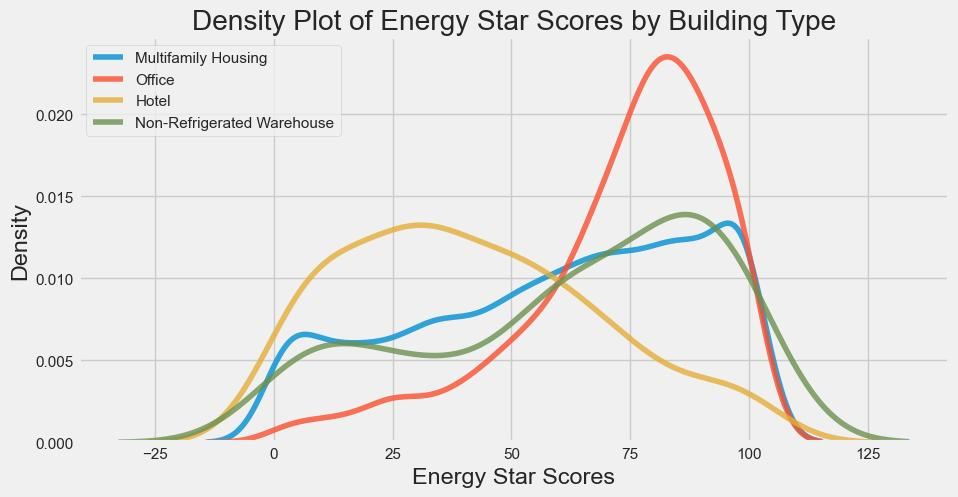

In [24]:
# 빌딩 유형 히스토그램 시각화

for b_type in types_100:
    subset = df[df['Largest Property Use Type'] == b_type]
    sns.kdeplot(subset['Score'].dropna(),
               label=b_type, alpha=0.8)

plt.xlabel('Energy Star Scores')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star Scores by Building Type')
plt.legend(loc='best')

범주형 변수2: **Borough** (빌딩 자치구 위치)

In [25]:
boroughs = df_has_score['Borough'].value_counts()  # 자치구별 빈도 계샨
print(boroughs)

boroughs = boroughs.index
print(boroughs)

Borough
Manhattan        3985
Brooklyn         1947
Queens           1707
Bronx            1655
Staten Island     119
Name: count, dtype: int64
Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object', name='Borough')


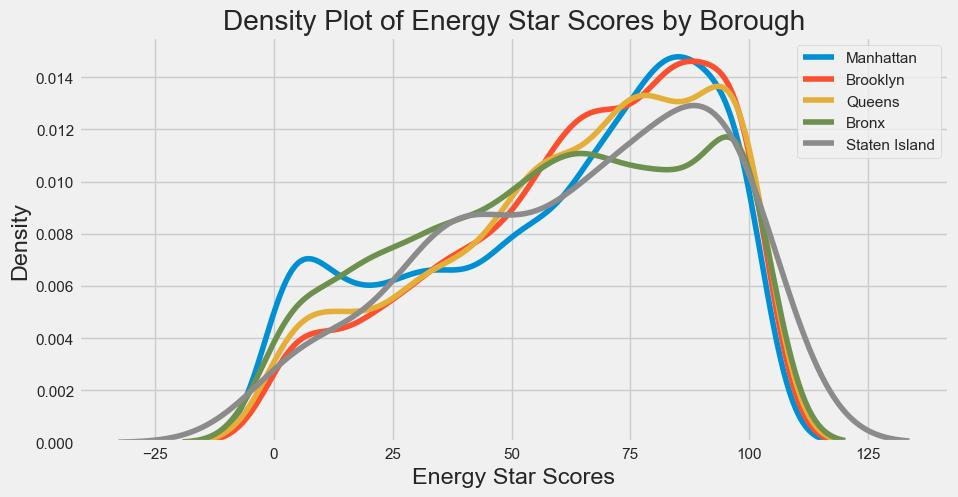

In [26]:
# 자치구 히스토그램 시각화
for borough in boroughs:
    subset = df[df['Borough'] == borough]
    sns.kdeplot(subset['Score'].dropna(),
               label=borough)

plt.xlabel("Energy Star Scores")
plt.ylabel('Density')
plt.title("Density Plot of Energy Star Scores by Borough")
plt.legend(loc='best')
    

**[데이터 탐색]** 대상 변수(Energy Star Score)와 수치형 변수와의 상관관계

In [27]:
# 수치형 데이터만 선택
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,...,1043.2,432503.0,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN
17,20,2777309,NaN,323000.0,1907,7,100,NaN,120.0,125.2,...,1666.5,598000.0,NaN,NaN,188.7,NaN,NaN,NaN,NaN,NaN
18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,...,368.3,321464.0,5915.6,18.40,103.3,NaN,NaN,NaN,NaN,NaN
19,22,4988574,179130.0,204720.0,1939,1,100,67.0,75.7,79.0,...,267.9,204720.0,NaN,NaN,106.6,40.857943,-73.934962,12.0,10.0,281.0
20,23,4988569,102150.0,116744.0,1939,1,100,80.0,77.1,82.7,...,100.4,116744.0,NaN,NaN,97.7,40.858256,-73.934734,12.0,10.0,281.0


In [29]:
# 대상변수와의 상관계수
corr = numeric_df.corr()['Score'].sort_values()
corr

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [30]:
"""
Two-Variable Plots
- Variable 1: Site EUI
- Variable 2: Largest Property Use Type
- Target: Energy Star Score
"""

# Extract the building types
df['Largest Property Use Type'] = df.dropna(subset = ['Score'])['Largest Property Use Type']

In [31]:
# Limit to building types with more than 100 observations
print(types_100)
df = df[df['Largest Property Use Type'].isin(types_100)]
df.shape

Index(['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse'], dtype='object', name='Largest Property Use Type')


(8979, 49)

Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

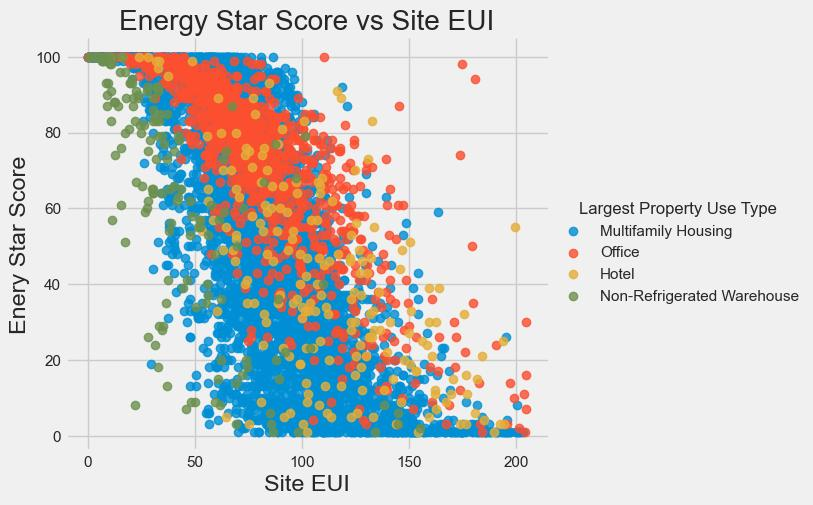

In [32]:
# Scatterplot of Score vs Site EUI

sns.lmplot(
    data=df,
    x='Site EUI (kBtu/ft²)', 
    y='Score',
    hue='Largest Property Use Type',
    scatter_kws={'alpha': 0.8}, 
    fit_reg=False,    
    aspect=1.2
)

plt.xlabel('Site EUI')
plt.ylabel('Enery Star Score')
plt.title('Energy Star Score vs Site EUI')

In [33]:
"""
Pairs Plot
"""

# Select the columns to plot
df_plot = df[['Score',
              'Site EUI (kBtu/ft²)',
              'Weather Normalized Site EUI (kBtu/ft²)',
              'Weather Normalized Source EUI (kBtu/ft²)',
              'Source EUI (kBtu/ft²)',
              'Weather Normalized Site Electricity Intensity (kWh/ft²)',
              'Total GHG Emissions (Metric Tons CO2e)']]

In [34]:
# Rename columns
df_plot.rename(columns={'Site EUI (kBtu/ft²)':
                        'Site EUI',
                       'Weather Normalized Site EUI (kBtu/ft²)':
                        'Weather Norm Site EUI',
                       'Weather Normalized Source EUI (kBtu/ft²)':
                        'Weather Norm Src EUI)',
                       'Source EUI (kBtu/ft²)':
                        'Source EUI',
                       'Weather Normalized Site Electricity Intensity (kWh/ft²)':
                        'Weather Norm Site Elec Intensity',
                       'Total GHG Emissions (Metric Tons CO2e)':
                       'Total GHG Emissions'}, inplace=True)

C:\Users\SangminPark\AppData\Local\Temp\ipykernel_23952\892916356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.rename(columns={'Site EUI (kBtu/ft²)':


In [35]:
# Replace the inf with nan
df_plot = df_plot.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop NA values
df_plot.dropna(inplace=True)

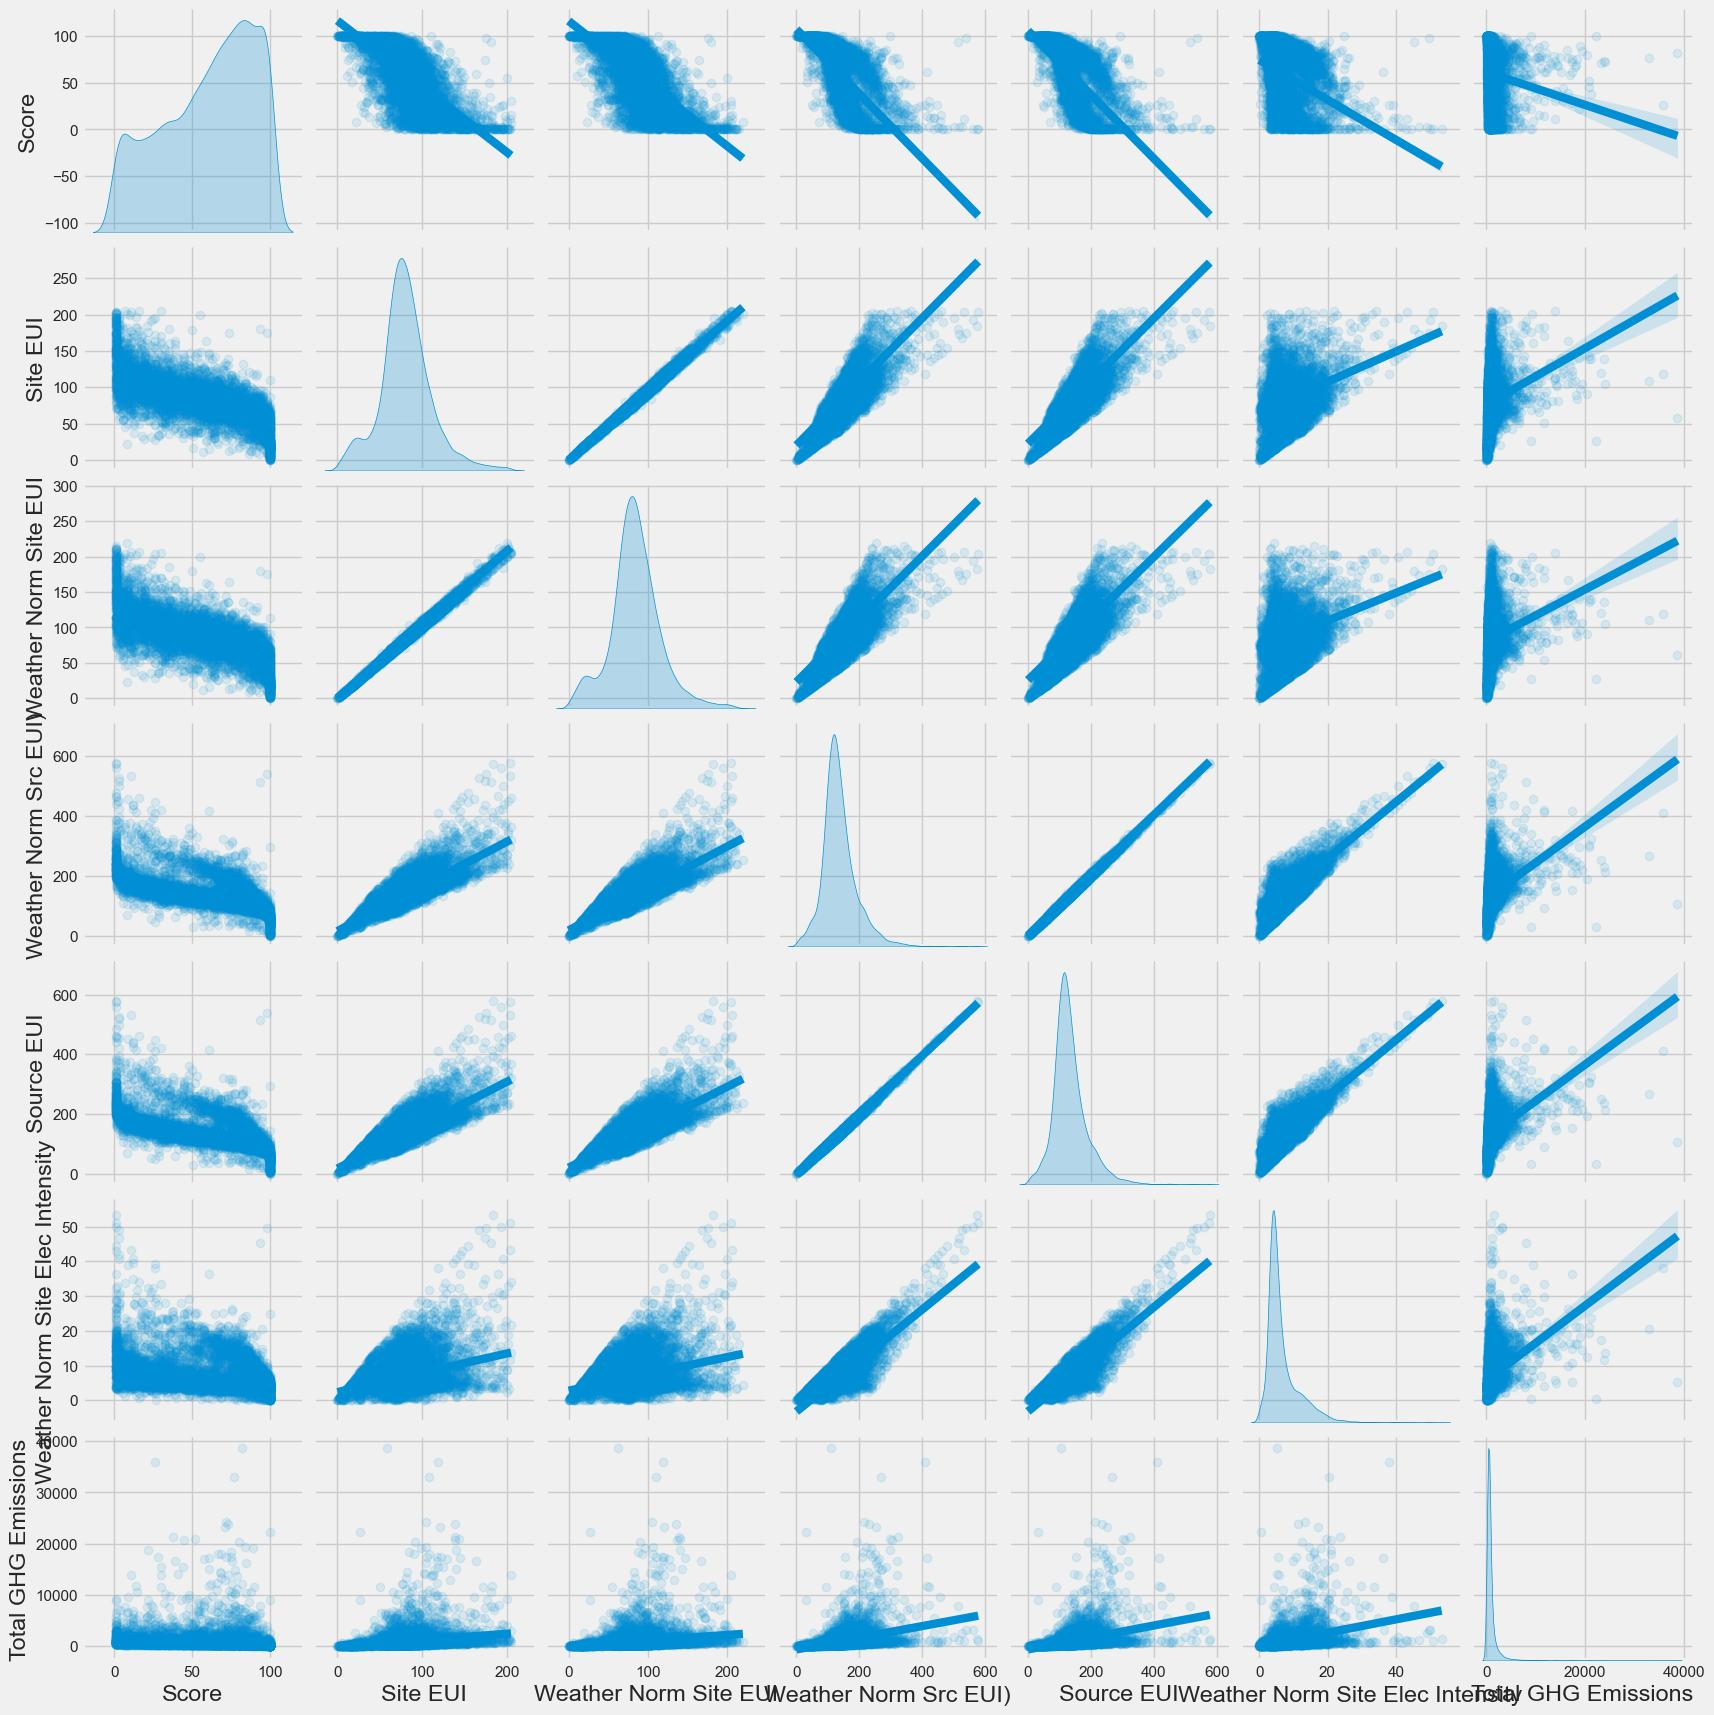

In [36]:
# Function to calculate correlation coefficient between two columns

# Plot a correlation matrix using pairplot
sns.pairplot(df_plot, kind='reg', diag_kind='kde', 
            plot_kws={'scatter_kws': {'alpha': 0.1}})


In [37]:
"""
Feature Extraction & Selection
"""

# Create columns with square root and log of numeric columns

df_numeric = df.select_dtypes('number') # select the numeric columns

for col in df_numeric.columns:
    # Skip the Energy Star Score column
    if col == 'Score':
        continue
    else:
        df_numeric['sqrt_' + col] = np.sqrt(df_numeric[col])
        df_numeric['log_' + col] = np.log(df_numeric[col])


c:\Users\SangminPark\anaconda3\envs\stock_program\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\SangminPark\anaconda3\envs\stock_program\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\SangminPark\anaconda3\envs\stock_program\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\SangminPark\anaconda3\envs\stock_program\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\SangminPark\anaconda3\envs\stock_program\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwa

In [38]:
df_numeric.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),...,sqrt_Latitude,log_Latitude,sqrt_Longitude,log_Longitude,sqrt_Community Board,log_Community Board,sqrt_Council District,log_Council District,sqrt_Census Tract,log_Census Tract
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,22,4988574,179130.0,204720.0,1939,1,100,67.0,75.7,79.0,...,6.392022,3.710101,NaN,NaN,3.464102,2.484907,3.162278,2.302585,16.763055,5.638355
20,23,4988569,102150.0,116744.0,1939,1,100,80.0,77.1,82.7,...,6.392046,3.710109,NaN,NaN,3.464102,2.484907,3.162278,2.302585,16.763055,5.638355
21,24,2806486,NaN,189766.0,1911,2,100,100.0,68.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# One-hot encoding for the categorical columns

df_categoric = df[['Borough', 'Largest Property Use Type']]  # Select the categorical columns
df_categoric.head()

,Borough,Largest Property Use Type
12,NaN,Multifamily Housing
18,NaN,Multifamily Housing
19,Manhattan,Multifamily Housing
20,Manhattan,Multifamily Housing
21,NaN,Multifamily Housing


In [40]:
df_categoric = pd.get_dummies(df_categoric)  # One-hot encoding
df_categoric.head()

,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Largest Property Use Type_Hotel,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office
12,False,False,False,False,False,False,True,False,False
18,False,False,False,False,False,False,True,False,False
19,False,False,True,False,False,False,True,False,False
20,False,False,True,False,False,False,True,False,False
21,False,False,False,False,False,False,True,False,False


In [41]:
# Join the two DataFrames using concat
df_transformed = pd.concat([df_numeric, df_categoric], axis=1)

# Drop buildings without an Energy Star Score
df_transformed.dropna(subset=['Score'], inplace=True)

In [42]:
df_transformed.shape

(8979, 94)

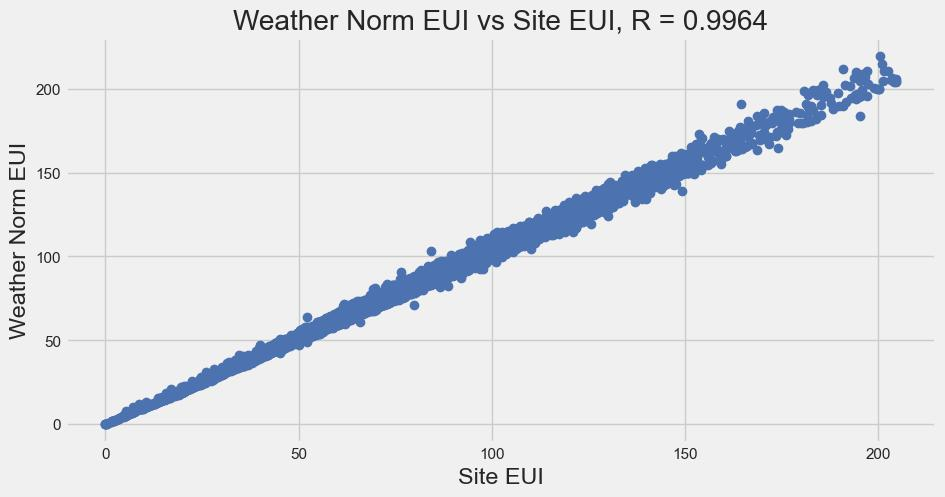

In [43]:
"""
Remove Collinear Features
"""

df_plot = df[['Weather Normalized Site EUI (kBtu/ft²)', 
              'Site EUI (kBtu/ft²)']].dropna()

plt.plot(df_plot['Site EUI (kBtu/ft²)'], 
         df_plot['Weather Normalized Site EUI (kBtu/ft²)'], 
         'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % 
          np.corrcoef(df[['Weather Normalized Site EUI (kBtu/ft²)',
                          'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [44]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Score']
    x = x.drop(columns = ['Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['Score'] = y
               
    return x

In [45]:
# Remove the collinear features above a specified correlation coefficient
collinear_threshold = 0.6
features = remove_collinear_features(df_transformed, collinear_threshold)

In [46]:
# Remove any columns with all na values
features.dropna(axis=1, how = 'all', inplace=True)
features.shape

(8979, 22)

In [47]:

features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8979 entries, 12 to 11745
Data columns (total 22 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       8979 non-null   int64  
 1   Property Id                                                 8979 non-null   int64  
 2   DOF Gross Floor Area                                        8942 non-null   float64
 3   Year Built                                                  8979 non-null   int64  
 4   Number of Buildings - Self-reported                         8979 non-null   int64  
 5   Occupancy                                                   8979 non-null   int64  
 6   Site EUI (kBtu/ft²)                                         8979 non-null   float64
 7   Weather Normalized Site Electricity Intensity (kWh/ft²)     8542 non-null   float64
 8   W

In [49]:
"""
Split Into Training and Testing Sets
"""

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
targets = pd.DataFrame(features['Score']) # y: vector
features = features.drop(columns='Score') # X: matrix

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Handle the missing values with imputations
features.interpolate(inplace=True)
features.bfill(inplace=True)

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape) # 학습 시 정답지
print(y_test.shape) # 테스트 시 정답

KeyError: 'Score'

In [50]:
# Train the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


c:\Users\SangminPark\anaconda3\envs\stock_program\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [51]:
# Predict scores
y_hat = model.predict(X_test) 
print(y_test.values.reshape(-1), y_hat)

[82. 23. 44. ... 78. 87. 78.] [75.77 34.74 45.47 ... 56.6  82.53 72.81]


In [52]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_hat)

In [53]:
print("Baseline Performance on the test set: MAE = %0.4f" % mae)

Baseline Performance on the test set: MAE = 9.2371


In [54]:
print(y_test.values.reshape(-1).shape)

(2694,)


Text(0, 0.5, 'Prediction')

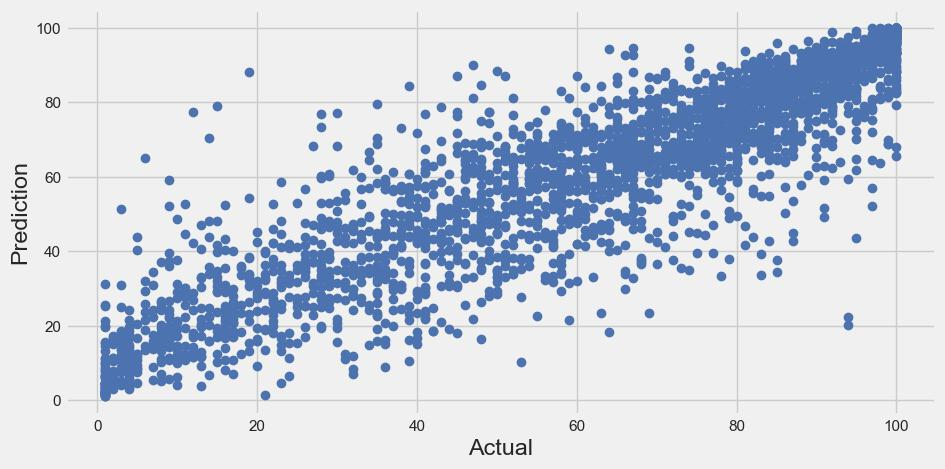

In [55]:
plt.plot(y_test.values.reshape(-1), y_hat, 'bo')
plt.xlabel("Actual")
plt.ylabel("Prediction")